In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
y = 20
vel = {0:"u", 1:"v", 2:"w"}

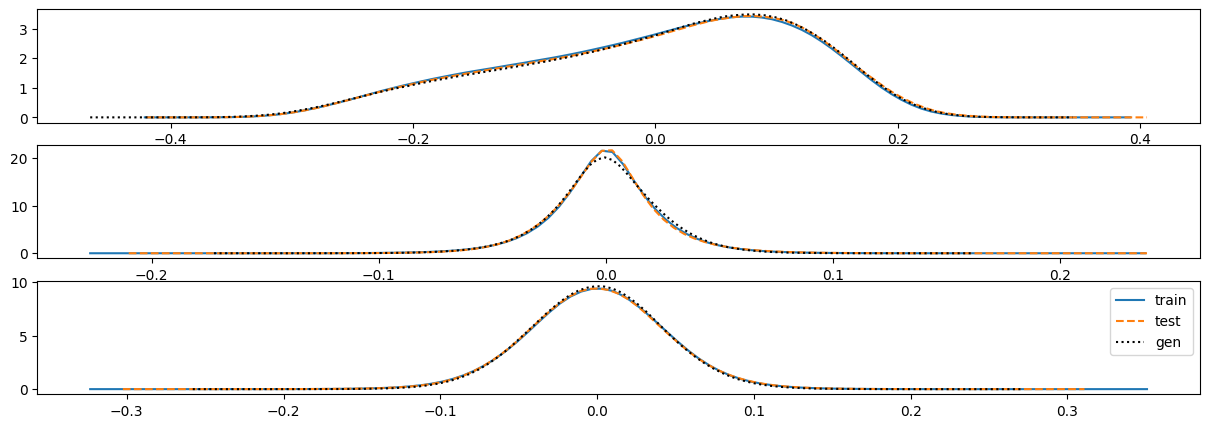

In [40]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 5))
for i in range(3):
    gt = np.load(f"/home/xiantao/case/wall_pressure/bigchannel/data/to_meet/channel_180_{vel[i]}_y{y}_all_out.npy")
    gen = np.load("/home/meet/FlowMatchingTests/conditional-flow-matching/physics_flow_matching/vf_fm/exps/exp_3/samples_1iter_640.npy")[:, i:i+1]
    gt_train = gt[:36000]
    gt_test = gt[36000:]
    train_hist = np.histogram(gt_train.flatten(), bins=100, density=True)
    test_hist = np.histogram(gt_test.flatten(), bins=100, density=True)
    gen_hist = np.histogram(gen.flatten(), bins=100, density=True)
    axes[i].plot((train_hist[1][:-1] + train_hist[1][1:])/2, train_hist[0], label="train")
    axes[i].plot((test_hist[1][:-1] + test_hist[1][1:])/2, test_hist[0], label="test", linestyle="--")
    axes[i].plot((gen_hist[1][:-1] + gen_hist[1][1:])/2, gen_hist[0], label="gen", linestyle=":", color="black")
plt.legend()
plt.show()